# Learning how to work with data !

## Pandas

In [1]:
import pandas as pd

### importing csv

In [ ]:
life_expect = pd.read_csv('./csv/life_expectancy_years.csv')

### getting info on the data

In [ ]:
print(life_expect.head()) # print the first 5 rows of the dataframe
print(life_expect.tail()) # print the last 5 rows of the dataframe

In [ ]:
print(life_expect.describe()) # print the summary statistics of the dataframe

In [ ]:
print(life_expect.info()) # print the summary information of the dataframe

In [ ]:
print(life_expect.shape) # print the shape of the dataframe

### setting custom index

In [ ]:
life_expect = life_expect.set_index('country') # set the index of the dataframe to the 'country' column
print(life_expect) # set the index of the dataframe to the 'country' column

### Plotting / Visalizing the data using MatplotLib

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
life_expect.plot() # stupid plot of the whole dataframe
plt.show() # show the plot

In [ ]:
life_expect.loc['France'].plot(title="France Life expectancy Projections", ylabel="Life expectancy", xlabel="Year", xticks=np.arange(0, 281, 40)) # plot the life expectancy of France
plt.show()

In [ ]:
path = './csv/population_total.csv'
pop_tot = pd.read_csv(path, index_col='country')
pop_tot = pop_tot.T # transpose the dataframe (make the rows the culumns)
mapping = str.maketrans({'k': 'e3', 'M': 'e6', 'B': 'e9'})
pop_tot = pop_tot.map(lambda y: y.translate(mapping))
pop_tot = pop_tot.astype(float).astype(int)
print(pop_tot)
pop_tot.loc[:"2050", ["France", "Belgium"]].plot(title="Population Projections", ylabel="Population", xlabel="Year", xticks=np.arange(0, 251, 40))
plt.legend(loc='lower right')
plt.yticks(np.arange(20000000, 70000000, 20000000), labels=['20M', '40M', '60M'])
plt.show()

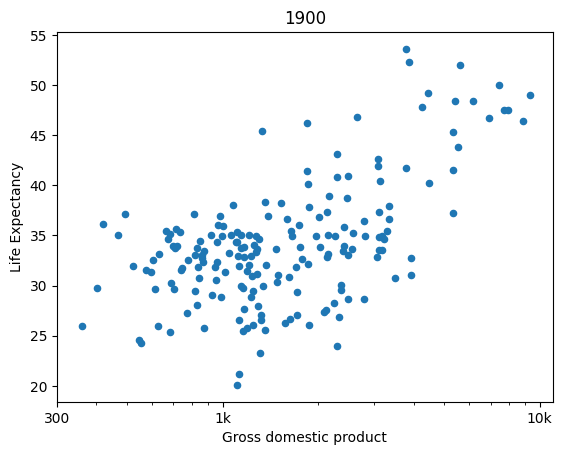

In [8]:
life_expect = pd.read_csv('./csv/life_expectancy_years.csv', usecols=['country', '1900'])
gdp = pd.read_csv('./csv/income_per_person_gdppercapita_ppp_inflation_adjusted.csv', usecols=['country', '1900'])
life_expect = life_expect.set_index('country')
gdp = gdp.set_index('country')
life_expect.columns = ['life_expectancy']
gdp.columns = ['gdp']
df = pd.concat([life_expect, gdp], axis=1)
df.dropna(axis=0, inplace=True, how='any')

df.plot(kind='scatter', x='gdp', y='life_expectancy', logx=True)
plt.ylabel("Life Expectancy")
plt.xlabel("Gross domestic product")
plt.title("1900")
plt.xticks([300, 1000, 10000], [300, "1k", "10k"])
plt.show()
# print(df)